In [11]:
import pandas as pd

In [12]:
df = pd.read_csv("nba_games.csv", index_col = 0)

In [13]:
df = df.sort_values("date")

In [14]:
df = df.reset_index(drop = True)

In [15]:
del df["mp.1"]
del df["mp_opp.1"]
del df["index_opp"]

In [16]:
def add_target(group):
    group["target"] = group["won"].shift(-1)
    return group

df = df.groupby("team", group_keys = False).apply(add_target)

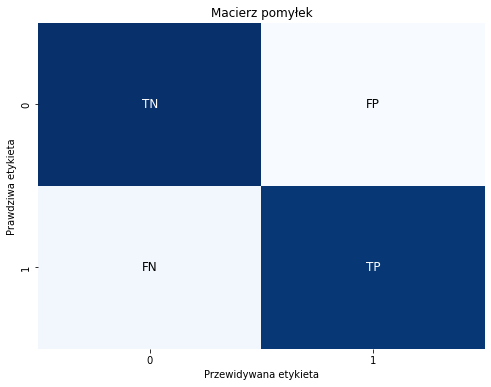

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

confusion_matrix = np.array([[85, 15],
                             [17, 83]])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_matrix, annot=False, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Przewidywana etykieta')
plt.ylabel('Prawdziwa etykieta')

for (i, j), val in np.ndenumerate(confusion_matrix):
    label = 'TP' if i == 1 and j == 1 else 'FP' if i == 0 and j == 1 else 'FN' if i == 1 and j == 0 else 'TN'
    ax.text(j+0.5, i+0.5, f'{label}', ha='center', va='center', color='black' if label in ['FP', 'FN'] else 'white', fontsize=12)

plt.title('Macierz pomyłek')
#plt.savefig("macierz.jpg")

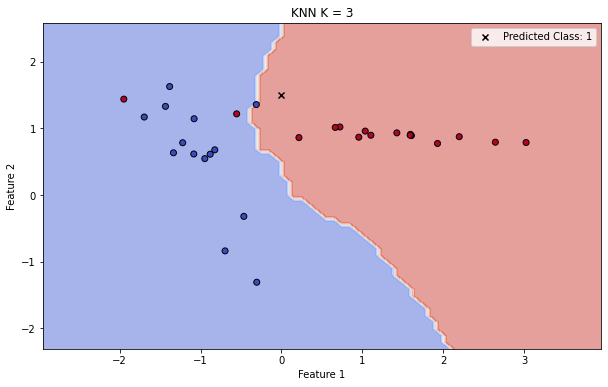

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("KNN K = 3")

new_point = np.array([[0, 1.5]]) 
predicted_class = knn.predict(new_point)
plt.scatter(new_point[:, 0], new_point[:, 1], color='black', marker='x', label=f'Predicted Class: {predicted_class[0]}')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

Text(0.5, 1.0, 'Separowalność za pomocą SVM')

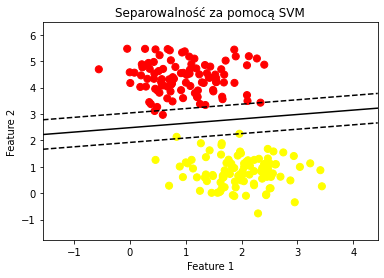

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

model = SVC(kernel='linear')
model.fit(X, y)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
yy = a * xx - (model.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Separowalność za pomocą SVM')

In [17]:
df["target"][pd.isnull(df["target"])] = 2
df["target"] = df["target"].astype(int, errors="ignore")

c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df["won"].value_counts()

False    4943
True     4943
Name: won, dtype: int64

In [19]:
df["target"].value_counts()

0    4928
1    4928
2      30
Name: target, dtype: int64

In [21]:
nulls = pd.isnull(df)

In [22]:
nulls = nulls.sum()

In [23]:
nulls = nulls[nulls > 0]
nulls

+/-             9886
mp_max          9886
mp_max.1        9886
+/-_opp         9886
mp_max_opp      9886
mp_max_opp.1    9886
dtype: int64

In [24]:
valid_columns = df.columns[~df.columns.isin(nulls.index)]
valid_columns

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp', 'team_opp', 'total_opp',
       'home_opp', 'season', 'date', 'won', 'target'],
      dtype='object', length=142)

In [25]:
df = df[valid_columns].copy()

In [29]:
df = df.filter(regex='^(?!.*_max)').copy()

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_df.fillna(numeric_df.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.9) + 1
print(f"Liczba składowych wyjaśniających 90% wariancji: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
pca_components = pca.components_

importance = np.sum(np.abs(pca_components), axis=0)
importance_df = pd.DataFrame({'Feature': numeric_df.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(12))

Liczba składowych wyjaśniających 90% wariancji: 17
     Feature  Importance
61  ast%_opp    2.173079
26      ast%    2.173073
28      blk%    1.976690
63  blk%_opp    1.976689
15       blk    1.904166
50   blk_opp    1.904165
13       ast    1.888862
48   ast_opp    1.888857
5        3pa    1.886442
40   3pa_opp    1.886440
21      3par    1.860326
56  3par_opp    1.860325


c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

selected_columns = ["fg", "ast", "trb", "stl", "blk", "tov", "efg%", "3par", "ast%", "orb%", "ortg", "tov%"]
df_selected = df[selected_columns]

df_selected.replace([np.inf, -np.inf], np.nan, inplace=True)

df_selected.fillna(df_selected.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

pca = PCA(n_components=min(X_scaled.shape[1], X_scaled.shape[0]))
pca.fit(X_scaled)

pca_components = pca.components_

importance = np.sum(np.abs(pca_components), axis=0)
importance_df = pd.DataFrame({'Feature': df_selected.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Najważniejsze cechy:")
print(importance_df.head(12))

pca_df = pd.DataFrame(pca_components, columns=selected_columns)

explained_variance = pca.explained_variance_ratio_
pca_df['Explained Variance'] = explained_variance

print("\nSkładowe główne i ich współczynniki:")
print(pca_df)

for i in range(len(pca_df)):
    component = pca_df.iloc[i, :-1] 
    explained_var = pca_df.iloc[i, -1]  
    print(f"\nPC{i+1} (Wyjaśniona wariancja: {explained_var:.2%}):")
    for feature, value in component.items():
        print(f"{feature}: {value:.4f}")

Najważniejsze cechy:
   Feature  Importance
8     ast%    3.058149
1      ast    2.854720
6     efg%    2.844090
10    ortg    2.725383
0       fg    2.651934
5      tov    2.624446
11    tov%    2.527983
9     orb%    2.492437
7     3par    2.415246
2      trb    2.163503
3      stl    2.158128
4      blk    2.035881

Składowe główne i ich współczynniki:
          fg       ast       trb       stl       blk       tov      efg%  \
0   0.475412  0.458815 -0.014494  0.014435  0.029087 -0.146394  0.467189   
1  -0.047870  0.215232  0.017005  0.071449  0.069307  0.617591  0.169129   
2   0.201588 -0.084365  0.576705 -0.033729  0.178851  0.182443 -0.042799   
3   0.227618 -0.282129 -0.399498  0.211066 -0.188010  0.193640  0.320077   
4   0.080487  0.183021 -0.062536  0.761966  0.342681 -0.047706 -0.178949   
5   0.030163 -0.115020 -0.017120 -0.289332  0.863556 -0.014472  0.142222   
6  -0.065298 -0.216908  0.082807  0.503787  0.105562 -0.027770  0.050916   
7   0.281007  0.055219  0.632754  

c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
c:\users\kowal\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
